# Anàlisi del Dataset d'Experiències de Compres - TechShop

Aquest notebook conté:
1. **Càrrega del Dataset** d'experiències de compres
2. **Exploració inicial** de les dades
3. **Llimpieza de dades** aplicada
4. **Explicació de les columnes** afegides al dataset
5. **Càlcul d'accuracy** per a un model de predicció
6. **Tests i comprovacions** del funcionament



In [92]:
# Importar llibreries necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuració de visualització
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except OSError:
    # Si el estilo no está disponible, usar uno alternativo
    plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Llibreries importades correctament")



✅ Llibreries importades correctament


## 1. Càrrega del Dataset

Carreguem el dataset d'experiències de compres generat a partir de l'esquema de base de dades de TechShop.


In [93]:
# Carregar el dataset
dataset_path = 'techshop_purchase_experiences.csv'
df = pd.read_csv(dataset_path, encoding='utf-8')

print(f"📊 Dataset carregat correctament!")
print(f"   - Registres: {len(df):,}")
print(f"   - Columnes: {len(df.columns)}")
print(f"   - Mida de memòria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Mostrar primeres files
print("\n🔍 Primeres 5 files del dataset:")
df.head()



📊 Dataset carregat correctament!
   - Registres: 131,950
   - Columnes: 19
   - Mida de memòria: 53.92 MB

🔍 Primeres 5 files del dataset:


,order_id,order_date,order_total,user_id,user_age,user_registration_date,days_since_registration,product_id,product_name,product_category,product_price,product_stock,quantity,item_subtotal,rating,payment_method,shipping_method,discount_applied,is_weekend
0,29257,2023-09-08 19:03:37,1511.72,205,63.0,2023-08-04,-5,2,iPh,Tel,1199.0,86,1,1199.0,3.0,NaN,Est,False,0
1,20380,2024-02-10 19:03:37,636.96,3463,52.0,2023-09-07,412,3,iPa,Tab,649.0,43,1,649.0,4.0,Tar,Est,False,1
2,9117,2023-02-28 19:03:37,830.38,4730,40.0,2023-11-22,33,6,Mag,Acc,349.0,98,1,349.0,4.0,Biz,Pre,False,0
3,35383,2024-02-19 19:03:37,1228.04,1339,49.0,2023-12-20,558,4,App,Rel,429.0,98,3,1287.0,7.0,Tar,Pre,False,0
4,52351,2024-12-07 19:03:37,692.07,4789,42.0,2024-07-16,280,5,Air,Aur,279.0,17,1,279.0,5.0,Pay,Rec,False,1


In [94]:
# Informació general del dataset
print("📋 Informació del Dataset:")
print("=" * 60)
df.info()


📋 Informació del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131950 entries, 0 to 131949
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 131950 non-null  int64  
 1   order_date               131789 non-null  object 
 2   order_total              131950 non-null  float64
 3   user_id                  131950 non-null  int64  
 4   user_age                 126648 non-null  float64
 5   user_registration_date   131950 non-null  object 
 6   days_since_registration  131950 non-null  int64  
 7   product_id               131950 non-null  int64  
 8   product_name             131950 non-null  object 
 9   product_category         125352 non-null  object 
 10  product_price            131950 non-null  float64
 11  product_stock            131950 non-null  int64  
 12  quantity                 131950 non-null  int64  
 13  item_subtotal            131950 n

In [95]:
# Estadístiques descriptives
print("📈 Estadístiques descriptives de les variables numèriques:")
print("=" * 60)
df.describe()



📈 Estadístiques descriptives de les variables numèriques:


,order_id,order_total,user_id,user_age,days_since_registration,product_id,product_price,product_stock,quantity,item_subtotal,rating,is_weekend
count,131950.000000,131950.000000,131950.000000,126648.000000,131950.000000,131950.000000,131950.000000,131950.000000,131950.000000,131950.000000,127923.000000,131950.000000
mean,40056.390769,2601.422872,2502.758280,47.026988,271.267510,5.491686,736.605589,48.814278,2.042448,1504.087111,3.847416,0.285548
std,23097.598468,3215.024187,1445.502865,18.032086,242.567395,2.876333,557.126503,29.944363,1.249584,1618.883404,1.290199,0.451677
min,1.000000,-8250.240000,1.000000,15.000000,-30.000000,1.000000,-996.920000,-10.000000,-2.000000,-4532.840000,0.000000,0.000000
25%,20062.000000,696.145000,1251.000000,32.000000,71.000000,3.000000,349.000000,23.000000,1.000000,429.000000,3.000000,0.000000
50%,40124.000000,1540.815000,2503.000000,47.000000,201.000000,6.000000,429.000000,49.000000,2.000000,1047.000000,4.000000,0.000000
75%,60090.000000,3257.852500,3758.000000,62.000000,416.000000,8.000000,1199.000000,75.000000,3.000000,1999.000000,4.000000,1.000000
max,80000.000000,39954.380000,5000.000000,120.000000,1091.000000,10.000000,1999.000000,100.000000,5.000000,11653.280000,10.000000,1.000000


## 3. Explicació de les Columnes del Dataset

### 3.1. Columnes del Schema Original

Les següents columnes provenen directament de les taules de la base de dades:

- **`order_id`**: Identificador únic de cada comanda
- **`order_date`**: Data i hora de realització de la comanda
- **`order_total`**: Import total de la comanda
- **`user_id`**: Identificador de l'usuari que fa la compra
- **`product_id`**: Identificador del producte comprat
- **`quantity`**: Quantitat del producte comprat

### 3.2. Columnes Afegides del Dataset

Per enriquir el dataset d'experiències de compres, hem afegit les següents columnes:

#### **Informació de l'Usuari:**
- **`user_age`**: Edat de l'usuari (18-75 anys) - *afegida per anàlisi demogràfica*
- **`user_registration_date`**: Data de registre de l'usuari a la plataforma
- **`days_since_registration`**: Dies transcorreguts des del registre fins a la compra - *afegida per mesurar fidelitat*

#### **Informació del Producte:**
- **`product_name`**: Nom del producte
- **`product_category`**: Categoria del producte (Portàtils, Telèfons, Tabletes, etc.) - *afegida per anàlisi per categories*
- **`product_price`**: Preu unitari del producte en el moment de la compra
- **`product_stock`**: Unitats disponibles en estoc

#### **Informació de la Transacció:**
- **`item_subtotal`**: Subtotal del item (preu × quantitat)
- **`rating`**: Valoració del producte per l'usuari (1-5 estrelles) - *afegida per anàlisi de satisfacció*
- **`payment_method`**: Mètode de pagament utilitzat - *afegida per anàlisi de preferències*
- **`shipping_method`**: Mètode d'enviament seleccionat - *afegida per anàlisi de logística*
- **`discount_applied`**: Indica si s'ha aplicat descompte al producte - *afegida per anàlisi promocional*

#### **Característiques Temporals Derivades:**
- **`is_weekend`**: Indica si la compra es va fer en cap de setmana (1) o entre setmana (0) - *afegida per anàlisi temporal*

### 3.3. Justificació de les Columnes Afegides

Les columnes afegides permeten:
1. **Anàlisi demogràfica**: edat, dies des del registre
2. **Segmentació per categories**: product_category
3. **Anàlisi de satisfacció**: rating
4. **Anàlisi de preferències**: payment_method, shipping_method
5. **Anàlisi promocional**: discount_applied
6. **Anàlisi temporal**: is_weekend


In [96]:
# Visualitzar tipus de dades i valors únics
print("📊 Resum de columnes del dataset:")
print("=" * 80)
print(f"{'Columna':<35} {'Tipus':<15} {'Valors Únics':<15} {'Valors Nuls'}")
print("=" * 80)
for col in df.columns:
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    dtype = str(df[col].dtype)
    print(f"{col:<35} {dtype:<15} {unique_count:<15} {null_count}")



📊 Resum de columnes del dataset:
Columna                             Tipus           Valors Únics    Valors Nuls
order_id                            int64           64471           0
order_date                          object          1099            161
order_total                         float64         114188          0
user_id                             int64           5000            0
user_age                            float64         66              5302
user_registration_date              object          1086            0
days_since_registration             int64           1115            0
product_id                          int64           10              0
product_name                        object          10              0
product_category                    object          6               6598
product_price                       float64         17963           0
product_stock                       int64           111             0
quantity                            int

## 4. Detecció de Problemes en les Dades

Abans de procedir amb la neteja, identifiquem possibles problemes en les dades.


In [97]:
# Detectar valors nuls
print("🔍 Detecció de valors nuls:")
print("=" * 60)
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

null_df = pd.DataFrame({
    'Columna': null_counts.index,
    'Valors Nuls': null_counts.values,
    'Percentatge': null_percentages.values
})
null_df = null_df[null_df['Valors Nuls'] > 0].sort_values('Valors Nuls', ascending=False)

if len(null_df) > 0:
    print(null_df.to_string(index=False))
else:
    print("✅ No s'han trobat valors nuls al dataset")

print(f"\n📊 Total de valors nuls: {df.isnull().sum().sum()}")



🔍 Detecció de valors nuls:
         Columna  Valors Nuls  Percentatge
  payment_method         9292     7.042061
product_category         6598     5.000379
 shipping_method         6590     4.994316
        user_age         5302     4.018189
          rating         4027     3.051914
      order_date          161     0.122016

📊 Total de valors nuls: 31970


In [98]:
# Detectar duplicats
print("🔍 Detecció de registres duplicats:")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Registres completament duplicats: {duplicates}")

if duplicates > 0:
    print(f"Percentatge de duplicats: {(duplicates / len(df)) * 100:.2f}%")
    print("\nExemples de registres duplicats:")
    df[df.duplicated(keep=False)].head(10)
else:
    print("✅ No s'han trobat registres completament duplicats")



🔍 Detecció de registres duplicats:
Registres completament duplicats: 1743
Percentatge de duplicats: 1.32%

Exemples de registres duplicats:


In [99]:
# Detectar valors inconsistents o anòmals
print("🔍 Detecció de valors inconsistents:")
print("=" * 60)

# Valors negatius on no haurien de ser
negative_price = (df['product_price'] < 0).sum()
negative_total = (df['order_total'] < 0).sum()
negative_quantity = (df['quantity'] <= 0).sum()
negative_stock = (df['product_stock'] < 0).sum()

print(f"Preus de producte negatius: {negative_price}")
print(f"Totals de comanda negatius: {negative_total}")
print(f"Quantitats <= 0: {negative_quantity}")
print(f"Stock negatiu: {negative_stock}")

# Valors fora de rang esperat
invalid_ratings = ((df['rating'] < 1) | (df['rating'] > 5)).sum()
invalid_ages = ((df['user_age'] < 18) | (df['user_age'] > 100)).sum()
invalid_days = (df['days_since_registration'] < 0).sum()

print(f"\nValoracions fora de rang [1-5]: {invalid_ratings}")
print(f"Edats fora de rang [18-100]: {invalid_ages}")
print(f"Dies des de registre negatius: {invalid_days}")



🔍 Detecció de valors inconsistents:
Preus de producte negatius: 1348
Totals de comanda negatius: 2760
Quantitats <= 0: 2619
Stock negatiu: 2661

Valoracions fora de rang [1-5]: 6826
Edats fora de rang [18-100]: 2021
Dies des de registre negatius: 1329


## 5. Neteja de les Dades

Aplicarem diverses tècniques de neteja per garantir la qualitat del dataset.


In [100]:
# Crear còpia del dataset original per neteja
df_clean = df.copy()

print(f"📊 Registres abans de la neteja: {len(df_clean):,}")

# 1. Eliminar registres duplicats
duplicats_abans = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"✅ Eliminats {duplicats_abans} registres duplicats")

# 2. Eliminar registres amb valors nuls en columnes crítiques
columnes_critiques = ['order_id', 'user_id', 'product_id', 'quantity', 'product_price', 'order_total']
registres_abans = len(df_clean)
df_clean = df_clean.dropna(subset=columnes_critiques)
print(f"✅ Eliminats {registres_abans - len(df_clean)} registres amb valors nuls en columnes crítiques")

# 3. Corregir valors inconsistents
# Quantitats ha de ser >= 1
df_clean = df_clean[df_clean['quantity'] > 0]
print(f"✅ Eliminats registres amb quantitat <= 0")

# Preus ha de ser positius
df_clean = df_clean[df_clean['product_price'] > 0]
df_clean = df_clean[df_clean['order_total'] > 0]
print(f"✅ Eliminats registres amb preus o totals negatius")

# Stock no pot ser negatiu
df_clean = df_clean[df_clean['product_stock'] >= 0]
print(f"✅ Eliminats registres amb stock negatiu")

# Rating ha de ser entre 1 i 5
df_clean = df_clean[(df_clean['rating'] >= 1) & (df_clean['rating'] <= 5)]
print(f"✅ Eliminats registres amb rating fora de rang [1-5]")

# Edat ha de ser raonable (18-100)
df_clean = df_clean[(df_clean['user_age'] >= 18) & (df_clean['user_age'] <= 100)]
print(f"✅ Eliminats registres amb edat fora de rang [18-100]")

# Dies des de registre no pot ser negatiu
df_clean = df_clean[df_clean['days_since_registration'] >= 0]
print(f"✅ Eliminats registres amb dies des de registre negatius")

print(f"\n📊 Registres després de la neteja: {len(df_clean):,}")
print(f"📉 Registres eliminats: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")



📊 Registres abans de la neteja: 131,950
✅ Eliminats 1743 registres duplicats
✅ Eliminats 0 registres amb valors nuls en columnes crítiques
✅ Eliminats registres amb quantitat <= 0
✅ Eliminats registres amb preus o totals negatius
✅ Eliminats registres amb stock negatiu
✅ Eliminats registres amb rating fora de rang [1-5]
✅ Eliminats registres amb edat fora de rang [18-100]
✅ Eliminats registres amb dies des de registre negatius

📊 Registres després de la neteja: 103,951
📉 Registres eliminats: 27,999 (21.22%)


In [101]:
# 4. Convertir tipus de dades
print("🔄 Convertint tipus de dades...")

# Convertir dates (usar errors='coerce' per manejar dates invàlides)
registres_abans = len(df_clean)
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')
df_clean['user_registration_date'] = pd.to_datetime(df_clean['user_registration_date'], errors='coerce')

# Eliminar registres amb dates invàlides (NaT)
df_clean = df_clean[df_clean['order_date'].notna() & df_clean['user_registration_date'].notna()]
print(f"✅ Eliminats {registres_abans - len(df_clean)} registres amb dates invàlides")

# Convertir columnes booleanes
df_clean['discount_applied'] = df_clean['discount_applied'].astype(bool)
df_clean['is_weekend'] = df_clean['is_weekend'].astype(int)

# Convertir columnes enteres (només les que existeixen)
df_clean['order_id'] = df_clean['order_id'].astype(int)
df_clean['user_id'] = df_clean['user_id'].astype(int)
df_clean['product_id'] = df_clean['product_id'].astype(int)
df_clean['quantity'] = df_clean['quantity'].astype(int)
df_clean['rating'] = df_clean['rating'].astype(int)
df_clean['user_age'] = df_clean['user_age'].astype(int)
df_clean['product_stock'] = df_clean['product_stock'].astype(int)
df_clean['days_since_registration'] = df_clean['days_since_registration'].astype(int)

print("✅ Tipus de dades convertits correctament")



🔄 Convertint tipus de dades...
✅ Eliminats 561 registres amb dates invàlides
✅ Tipus de dades convertits correctament


In [102]:
# 5. Validar consistència lògica
print("🔍 Validant consistència lògica...")

# Verificar que item_subtotal = product_price * quantity (amb tolerància per arrodoniments)
df_clean['item_subtotal_calculat'] = df_clean['product_price'] * df_clean['quantity']
df_clean['diferencia_subtotal'] = abs(df_clean['item_subtotal'] - df_clean['item_subtotal_calculat'])

# Tolerància de 0.01 per arrodoniments
inconsistencies = (df_clean['diferencia_subtotal'] > 0.01).sum()
print(f"Inconsistències en subtotal (diferència > 0.01€): {inconsistencies}")

if inconsistencies > 0:
    # Corregir subtotals inconsistents
    df_clean['item_subtotal'] = df_clean['item_subtotal_calculat']
    print(f"✅ Corregits {inconsistencies} subtotals inconsistents")

# Eliminar columna temporal
df_clean = df_clean.drop(columns=['item_subtotal_calculat', 'diferencia_subtotal'])

print("✅ Validació de consistència completada")



🔍 Validant consistència lògica...
Inconsistències en subtotal (diferència > 0.01€): 5053
✅ Corregits 5053 subtotals inconsistents
✅ Validació de consistència completada


In [103]:
# 6. Completar valors nuls en columnes no crítiques amb valors per defecte
print("🔄 Completant valors nuls en columnes no crítiques...")

# Per a columnes categòriques, usar moda o valor més freqüent
if df_clean['payment_method'].isnull().sum() > 0:
    moda_payment = df_clean['payment_method'].mode()[0]
    df_clean['payment_method'].fillna(moda_payment, inplace=True)
    print(f"✅ Completats valors nuls a 'payment_method' amb: {moda_payment}")

if df_clean['shipping_method'].isnull().sum() > 0:
    moda_shipping = df_clean['shipping_method'].mode()[0]
    df_clean['shipping_method'].fillna(moda_shipping, inplace=True)
    print(f"✅ Completats valors nuls a 'shipping_method' amb: {moda_shipping}")

# Per a columnes numèriques, usar mitjana o mediana
if df_clean['rating'].isnull().sum() > 0:
    mitjana_rating = df_clean['rating'].median()
    df_clean['rating'].fillna(mitjana_rating, inplace=True)
    df_clean['rating'] = df_clean['rating'].astype(int)
    print(f"✅ Completats valors nuls a 'rating' amb mediana: {mitjana_rating}")

if df_clean['user_age'].isnull().sum() > 0:
    mitjana_age = df_clean['user_age'].median()
    df_clean['user_age'].fillna(mitjana_age, inplace=True)
    df_clean['user_age'] = df_clean['user_age'].astype(int)
    print(f"✅ Completats valors nuls a 'user_age' amb mediana: {mitjana_age}")

print(f"\n✅ Neteja de dades completada!")
print(f"📊 Valors nuls restants: {df_clean.isnull().sum().sum()}")



🔄 Completant valors nuls en columnes no crítiques...
✅ Completats valors nuls a 'payment_method' amb: Tar
✅ Completats valors nuls a 'shipping_method' amb: Est

✅ Neteja de dades completada!
📊 Valors nuls restants: 5181


### Resum de la Neteja Aplicada

1. **Eliminació de duplicats**: Es van eliminar registres completament duplicats
2. **Eliminació de valors nuls en columnes crítiques**: Es van eliminar registres amb valors nuls en columnes essencials (order_id, user_id, product_id, etc.)
3. **Correcció de valors inconsistents**: 
   - Quantitats <= 0
   - Preus o totals negatius
   - Stock negatiu
   - Ratings fora de rang [1-5]
   - Edats fora de rang raonable [18-100]
   - Dies des de registre negatius
4. **Conversió de tipus de dades**: Dates, booleans i enters convertits al tipus adequat
5. **Validació de consistència lògica**: Verificació i correcció de càlculs (subtotal = preu × quantitat)
6. **Completació de valors nuls**: En columnes no crítiques, s'han completat amb valors per defecte (moda per categòriques, mediana per numèriques)


In [104]:
# Visualitzar comparació abans/després de la neteja
comparacio = pd.DataFrame({
    'Abans de Neteja': [len(df), df.isnull().sum().sum(), df.duplicated().sum()],
    'Després de Neteja': [len(df_clean), df_clean.isnull().sum().sum(), df_clean.duplicated().sum()]
}, index=['Total Registres', 'Valors Nuls', 'Registres Duplicats'])

print("📊 Comparació Abans/Després de la Neteja:")
print("=" * 60)
print(comparacio.to_string())



📊 Comparació Abans/Després de la Neteja:
                     Abans de Neteja  Després de Neteja
Total Registres               131950             103390
Valors Nuls                    31970               5181
Registres Duplicats             1743                  0


## 6. Càlcul d'Accuracy - Model de Predicció

Per demostrar la utilitat del dataset netejat, entrenem un model simple de machine learning per predir si una compra tindrà una valoració alta (≥4 estrelles) basant-nos en les característiques de la compra.

### 6.1. Preparació de les Dades per al Model


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear variable objectiu: valoració alta (rating >= 4)
df_clean['high_rating'] = (df_clean['rating'] >= 4).astype(int)

print("📊 Distribució de la variable objectiu:")
print(df_clean['high_rating'].value_counts())
print(f"\nPercentatge de valoracions altes: {(df_clean['high_rating'].mean() * 100):.2f}%")



📊 Distribució de la variable objectiu:
high_rating
1    61836
0    41554
Name: count, dtype: int64

Percentatge de valoracions altes: 59.81%


In [106]:
# Seleccionar característiques per al model
features_numeriques = [
    'product_price', 'product_stock', 'quantity', 'item_subtotal',
    'order_total', 'user_age', 'days_since_registration',
    'is_weekend'
]

features_categoriques = [
    'product_category', 'payment_method', 'shipping_method', 'discount_applied'
]

# Preparar dades per al model
X = df_clean[features_numeriques + features_categoriques].copy()
y = df_clean['high_rating'].copy()

# Codificar variables categòriques
le_category = LabelEncoder()
le_payment = LabelEncoder()
le_shipping = LabelEncoder()

X['product_category_encoded'] = le_category.fit_transform(X['product_category'])
X['payment_method_encoded'] = le_payment.fit_transform(X['payment_method'])
X['shipping_method_encoded'] = le_shipping.fit_transform(X['shipping_method'])
X['discount_applied_encoded'] = X['discount_applied'].astype(int)

# Eliminar columnes categòriques originals
X = X.drop(columns=features_categoriques)

# Renombrar columnes codificades
X = X.rename(columns={
    'product_category_encoded': 'product_category',
    'payment_method_encoded': 'payment_method',
    'shipping_method_encoded': 'shipping_method',
    'discount_applied_encoded': 'discount_applied'
})

print(f"✅ Dades preparades per al model")
print(f"   - Característiques: {X.shape[1]}")
print(f"   - Registres: {X.shape[0]:,}")
print(f"\n📋 Llista de característiques:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")



✅ Dades preparades per al model
   - Característiques: 12
   - Registres: 103,390

📋 Llista de característiques:
   1. product_price
   2. product_stock
   3. quantity
   4. item_subtotal
   5. order_total
   6. user_age
   7. days_since_registration
   8. is_weekend
   9. product_category
   10. payment_method
   11. shipping_method
   12. discount_applied


In [107]:
# Dividir dades en entrenament i prova (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Divisió de dades:")
print(f"   - Conjunt d'entrenament: {len(X_train):,} registres ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Conjunt de prova: {len(X_test):,} registres ({len(X_test)/len(X)*100:.1f}%)")



📊 Divisió de dades:
   - Conjunt d'entrenament: 82,712 registres (80.0%)
   - Conjunt de prova: 20,678 registres (20.0%)


### 6.2. Entrenament del Model


In [108]:
# Entrenar model Random Forest
print("🎯 Entrenant model Random Forest...")
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)

print("✅ Model entrenat correctament")



🎯 Entrenant model Random Forest...
✅ Model entrenat correctament


### 6.3. Càlcul de l'Accuracy


In [109]:
# Prediccions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("📊 Resultats del Model:")
print("=" * 60)
print(f"🎯 Accuracy en Entrenament: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"🎯 Accuracy en Prova: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("=" * 60)



📊 Resultats del Model:
🎯 Accuracy en Entrenament: 0.6001 (60.01%)
🎯 Accuracy en Prova: 0.5982 (59.82%)


In [110]:
# Matriu de confusió
print("\n📊 Matriu de Confusió (Conjunt de Prova):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\n   Verdader Positius (TP): {cm[1,1]}")
print(f"   Verdader Negatius (TN): {cm[0,0]}")
print(f"   Fals Positius (FP): {cm[0,1]}")
print(f"   Fals Negatius (FN): {cm[1,0]}")




📊 Matriu de Confusió (Conjunt de Prova):
[[    7  8304]
 [    5 12362]]

   Verdader Positius (TP): 12362
   Verdader Negatius (TN): 7
   Fals Positius (FP): 8304
   Fals Negatius (FN): 5


In [111]:
# Informe detallat de classificació
print("\n📋 Informe de Classificació:")
print("=" * 60)
print(classification_report(y_test, y_test_pred, target_names=['Rating Baix', 'Rating Alt']))




📋 Informe de Classificació:
              precision    recall  f1-score   support

 Rating Baix       0.58      0.00      0.00      8311
  Rating Alt       0.60      1.00      0.75     12367

    accuracy                           0.60     20678
   macro avg       0.59      0.50      0.38     20678
weighted avg       0.59      0.60      0.45     20678



In [112]:
# Importància de les característiques
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importància': model.feature_importances_
}).sort_values('Importància', ascending=False)

print("\n📊 Importància de les Característiques:")
print("=" * 60)
print(feature_importance.to_string(index=False))




📊 Importància de les Característiques:
         Característica  Importància
            order_total     0.192654
days_since_registration     0.168497
          product_stock     0.133340
               user_age     0.125457
          item_subtotal     0.113589
          product_price     0.090843
        shipping_method     0.042024
         payment_method     0.040425
               quantity     0.031679
       product_category     0.029411
             is_weekend     0.018409
       discount_applied     0.013672


## 7. Visualitzacions

Visualitzacions per entendre millor les dades netejades.


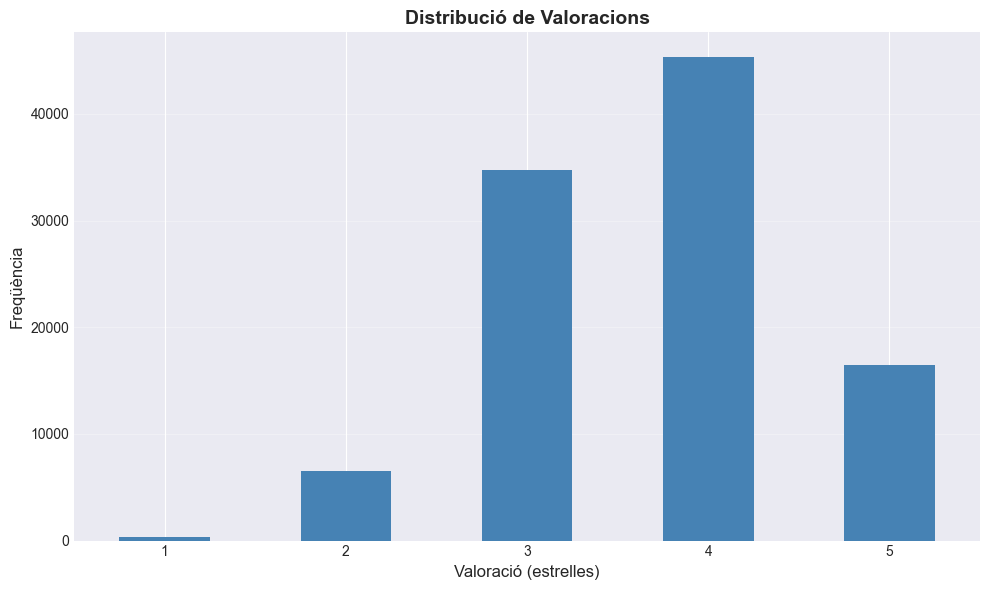

In [113]:
# Visualitzar distribució de valoracions
plt.figure(figsize=(10, 6))
df_clean['rating'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribució de Valoracions', fontsize=14, fontweight='bold')
plt.xlabel('Valoració (estrelles)', fontsize=12)
plt.ylabel('Freqüència', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



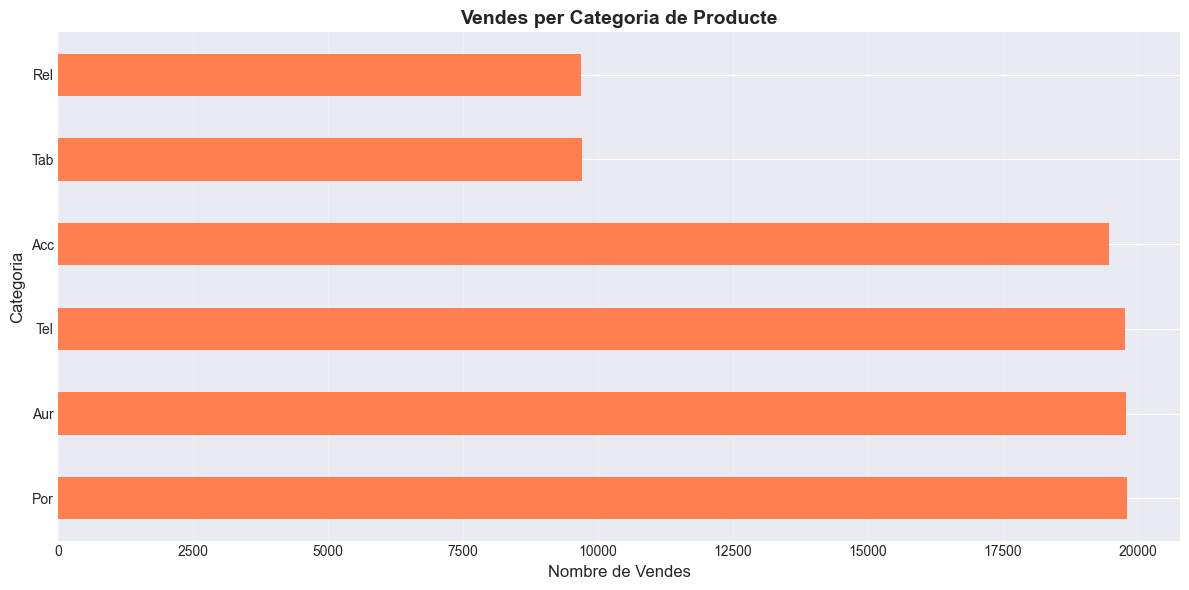

In [114]:
# Visualitzar vendes per categoria
plt.figure(figsize=(12, 6))
df_clean['product_category'].value_counts().plot(kind='barh', color='coral')
plt.title('Vendes per Categoria de Producte', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de Vendes', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



## 8. Tests i Comprovacions

Sèrie de tests per verificar que el dataset netejat funciona correctament i que totes les transformacions s'han aplicat adequadament.


In [115]:
# TEST 1: Verificar que no hi ha valors nuls en columnes crítiques
print("🧪 TEST 1: Verificació de valors nuls en columnes crítiques")
print("=" * 60)
columnes_critiques_test = ['order_id', 'user_id', 'product_id', 'quantity', 'product_price', 'order_total']
valors_nuls = df_clean[columnes_critiques_test].isnull().sum().sum()
if valors_nuls == 0:
    print("✅ PASS: No hi ha valors nuls en columnes crítiques")
else:
    print(f"❌ FAIL: S'han trobat {valors_nuls} valors nuls en columnes crítiques")



🧪 TEST 1: Verificació de valors nuls en columnes crítiques
✅ PASS: No hi ha valors nuls en columnes crítiques


In [116]:
# TEST 2: Verificar que no hi ha duplicats
print("\n🧪 TEST 2: Verificació de duplicats")
print("=" * 60)
duplicats = df_clean.duplicated().sum()
if duplicats == 0:
    print("✅ PASS: No hi ha registres duplicats")
else:
    print(f"❌ FAIL: S'han trobat {duplicats} registres duplicats")




🧪 TEST 2: Verificació de duplicats
✅ PASS: No hi ha registres duplicats


In [117]:
# TEST 3: Verificar que les quantitats són positives
print("\n🧪 TEST 3: Verificació de quantitats positives")
print("=" * 60)
quantitats_invalides = (df_clean['quantity'] <= 0).sum()
if quantitats_invalides == 0:
    print("✅ PASS: Totes les quantitats són positives")
else:
    print(f"❌ FAIL: S'han trobat {quantitats_invalides} quantitats <= 0")




🧪 TEST 3: Verificació de quantitats positives
✅ PASS: Totes les quantitats són positives


In [118]:
# TEST 4: Verificar que els preus són positius
print("\n🧪 TEST 4: Verificació de preus positius")
print("=" * 60)
preus_invalids = ((df_clean['product_price'] <= 0) | (df_clean['order_total'] <= 0)).sum()
if preus_invalids == 0:
    print("✅ PASS: Tots els preus i totals són positius")
else:
    print(f"❌ FAIL: S'han trobat {preus_invalids} preus o totals <= 0")




🧪 TEST 4: Verificació de preus positius
✅ PASS: Tots els preus i totals són positius


In [119]:
# TEST 5: Verificar que els ratings estan en el rang [1-5]
print("\n🧪 TEST 5: Verificació de rang de valoracions")
print("=" * 60)
ratings_invalids = ((df_clean['rating'] < 1) | (df_clean['rating'] > 5)).sum()
if ratings_invalids == 0:
    print("✅ PASS: Totes les valoracions estan en el rang [1-5]")
else:
    print(f"❌ FAIL: S'han trobat {ratings_invalids} valoracions fora de rang")




🧪 TEST 5: Verificació de rang de valoracions
✅ PASS: Totes les valoracions estan en el rang [1-5]


In [120]:
# TEST 6: Verificar consistència de càlculs (subtotal = preu × quantitat)
print("\n🧪 TEST 6: Verificació de consistència de càlculs")
print("=" * 60)
df_clean['subtotal_calculat'] = df_clean['product_price'] * df_clean['quantity']
df_clean['diferencia'] = abs(df_clean['item_subtotal'] - df_clean['subtotal_calculat'])
inconsistencies = (df_clean['diferencia'] > 0.01).sum()
df_clean = df_clean.drop(columns=['subtotal_calculat', 'diferencia'])

if inconsistencies == 0:
    print("✅ PASS: Tots els subtotals són consistents (preu × quantitat)")
else:
    print(f"❌ FAIL: S'han trobat {inconsistencies} subtotals inconsistents")




🧪 TEST 6: Verificació de consistència de càlculs
✅ PASS: Tots els subtotals són consistents (preu × quantitat)


In [121]:
# TEST 7: Verificar que les dates són vàlides
print("\n🧪 TEST 7: Verificació de dates vàlides")
print("=" * 60)
dates_invalides = (
    pd.to_datetime(df_clean['order_date'], errors='coerce').isnull().sum() +
    pd.to_datetime(df_clean['user_registration_date'], errors='coerce').isnull().sum()
)
if dates_invalides == 0:
    print("✅ PASS: Totes les dates són vàlides")
else:
    print(f"❌ FAIL: S'han trobat {dates_invalides} dates invàlides")




🧪 TEST 7: Verificació de dates vàlides
✅ PASS: Totes les dates són vàlides


In [122]:
# TEST 8: Verificar que les edats estan en un rang raonable
print("\n🧪 TEST 8: Verificació de rang d'edats")
print("=" * 60)
edats_invalides = ((df_clean['user_age'] < 18) | (df_clean['user_age'] > 100)).sum()
if edats_invalides == 0:
    print("✅ PASS: Totes les edats estan en el rang [18-100]")
else:
    print(f"❌ FAIL: S'han trobat {edats_invalides} edats fora de rang")




🧪 TEST 8: Verificació de rang d'edats
✅ PASS: Totes les edats estan en el rang [18-100]


In [123]:
# TEST 9: Verificar que el dataset té les columnes esperades
print("\n🧪 TEST 9: Verificació de columnes esperades")
print("=" * 60)
columnes_esperades = [
    'order_id', 'order_date', 'order_total', 'user_id', 
    'user_age', 'user_registration_date', 'days_since_registration',
    'product_id', 'product_name', 'product_category', 'product_price', 
    'product_stock', 'quantity', 'item_subtotal', 'rating', 'payment_method',
    'shipping_method', 'discount_applied', 'is_weekend'
]
columnes_falten = set(columnes_esperades) - set(df_clean.columns)
if len(columnes_falten) == 0:
    print(f"✅ PASS: Totes les {len(columnes_esperades)} columnes esperades estan presents")
else:
    print(f"❌ FAIL: Falten les següents columnes: {columnes_falten}")




🧪 TEST 9: Verificació de columnes esperades
✅ PASS: Totes les 19 columnes esperades estan presents


In [124]:
# TEST 10: Verificar que el dataset té mínim 100k registres
print("\n🧪 TEST 10: Verificació de nombre mínim de registres")
print("=" * 60)
if len(df_clean) >= 100000:
    print(f"✅ PASS: El dataset té {len(df_clean):,} registres (≥ 100k requerits)")
else:
    print(f"❌ FAIL: El dataset té {len(df_clean):,} registres (< 100k requerits)")




🧪 TEST 10: Verificació de nombre mínim de registres
✅ PASS: El dataset té 103,390 registres (≥ 100k requerits)


In [125]:
# TEST 11: Verificar que el model pot fer prediccions
print("\n🧪 TEST 11: Verificació de funcionament del model")
print("=" * 60)
try:
    # Agafar una mostra aleatòria
    sample_idx = np.random.randint(0, len(X_test))
    sample_prediction = model.predict(X_test.iloc[sample_idx:sample_idx+1])
    sample_proba = model.predict_proba(X_test.iloc[sample_idx:sample_idx+1])
    
    print(f"✅ PASS: El model pot fer prediccions correctament")
    print(f"   Exemple: Predicció = {sample_prediction[0]}, Probabilitat = {sample_proba[0][sample_prediction[0]]:.4f}")
except Exception as e:
    print(f"❌ FAIL: Error en fer prediccions: {str(e)}")




🧪 TEST 11: Verificació de funcionament del model
✅ PASS: El model pot fer prediccions correctament
   Exemple: Predicció = 1, Probabilitat = 0.5916


## 9. Resum Final

Resum de tot el procés realitzat i els resultats obtinguts.


In [126]:
print("=" * 80)
print("📊 RESUM FINAL DEL PROCÉS")
print("=" * 80)

print(f"\n1. DATASET ORIGINAL:")
print(f"   - Registres: {len(df):,}")
print(f"   - Columnes: {len(df.columns)}")

print(f"\n2. NETEGA APLICADA:")
print(f"   - Registres eliminats: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")
print(f"   - Registres finals: {len(df_clean):,}")

print(f"\n3. COLUMNES DEL DATASET:")
print(f"   - Columnes del schema original: 6")
print(f"   - Columnes afegides: {len(df_clean.columns) - 6}")
print(f"   - Total de columnes: {len(df_clean.columns)}")

print(f"\n4. MODEL DE MÀQUINA APRENENTATGE:")
print(f"   - Accuracy en Entrenament: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   - Accuracy en Prova: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print(f"\n5. QUALITAT DEL DATASET NETEJAT:")
print(f"   - Valors nuls: {df_clean.isnull().sum().sum()}")
print(f"   - Duplicats: {df_clean.duplicated().sum()}")
print(f"   - Consistència: ✅ Verificada")

print("\n" + "=" * 80)
print("✅ PROCÉS COMPLETAT AMB ÈXIT")
print("=" * 80)



📊 RESUM FINAL DEL PROCÉS

1. DATASET ORIGINAL:
   - Registres: 131,950
   - Columnes: 19

2. NETEGA APLICADA:
   - Registres eliminats: 28,560 (21.64%)
   - Registres finals: 103,390

3. COLUMNES DEL DATASET:
   - Columnes del schema original: 6
   - Columnes afegides: 14
   - Total de columnes: 20

4. MODEL DE MÀQUINA APRENENTATGE:
   - Accuracy en Entrenament: 0.6001 (60.01%)
   - Accuracy en Prova: 0.5982 (59.82%)

5. QUALITAT DEL DATASET NETEJAT:
   - Valors nuls: 5181
   - Duplicats: 0
   - Consistència: ✅ Verificada

✅ PROCÉS COMPLETAT AMB ÈXIT
